In [1737]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap


In [1738]:
taem_phase_color_map_val = [0, 1, 2, 3]
taem_phase_color_map = ListedColormap(['red', 'blue', 'green', 'orange'])

In [1739]:
data_taem = pd.read_csv('taem_dump.csv')

data_taem['time'] = data_taem['dtg'].cumsum()

xali = -27500.7961639
data_taem['drpred'] = data_taem['rpred'] + xali

data_taem.head()

data_taem.dtypes

,dtg,wow,h,hdot,x,y,surfv,surfv_h,xdot,ydot,...,gssh,hk,xk,xexp,herrexp,nzc1,nzc2h,nzc2i,Unnamed: 102,time
0,0.22,False,143905.470886,-402.202293,-51237.821318,-659100.518221,5227.404280,5211.908366,33.735512,5211.799184,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,0.22
1,0.24,False,143808.727249,-404.006980,-51211.630357,-657858.763347,5225.233881,5209.591872,33.825933,5209.482054,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,0.46
2,0.24,False,143711.542316,-405.772976,-51185.461345,-656617.551581,5223.066638,5207.280807,34.029168,5207.169617,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,0.70
3,0.24,False,143613.922986,-407.415372,-51159.300656,-655376.887083,5220.824961,5204.904032,34.275104,5204.791178,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,0.94
4,0.24,False,143515.922151,-408.829275,-51133.124888,-654136.792540,5218.465262,5202.426195,34.552377,5202.311453,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,1.18


dtg             float64
wow                bool
h               float64
hdot            float64
x               float64
y               float64
surfv           float64
surfv_h         float64
xdot            float64
ydot            float64
psd             float64
mach            float64
qbar            float64
cosphi          float64
costh           float64
weight          float64
gamma           float64
ovhd               bool
rwid             object
cubic_c3        float64
cubic_c4        float64
pbhc_0            int64
pbhc_1          float64
pbrc_0            int64
pbrc_1          float64
delrng            int64
dnzc            float64
dnzcl           float64
dnzll           float64
dnzul           float64
dpsac           float64
drpred          float64
dsbc_at         float64
dsbi              int64
eas_cmd         float64
emep            float64
eow             float64
eowerror        float64
en              float64
emax              int64
emin              int64
es              

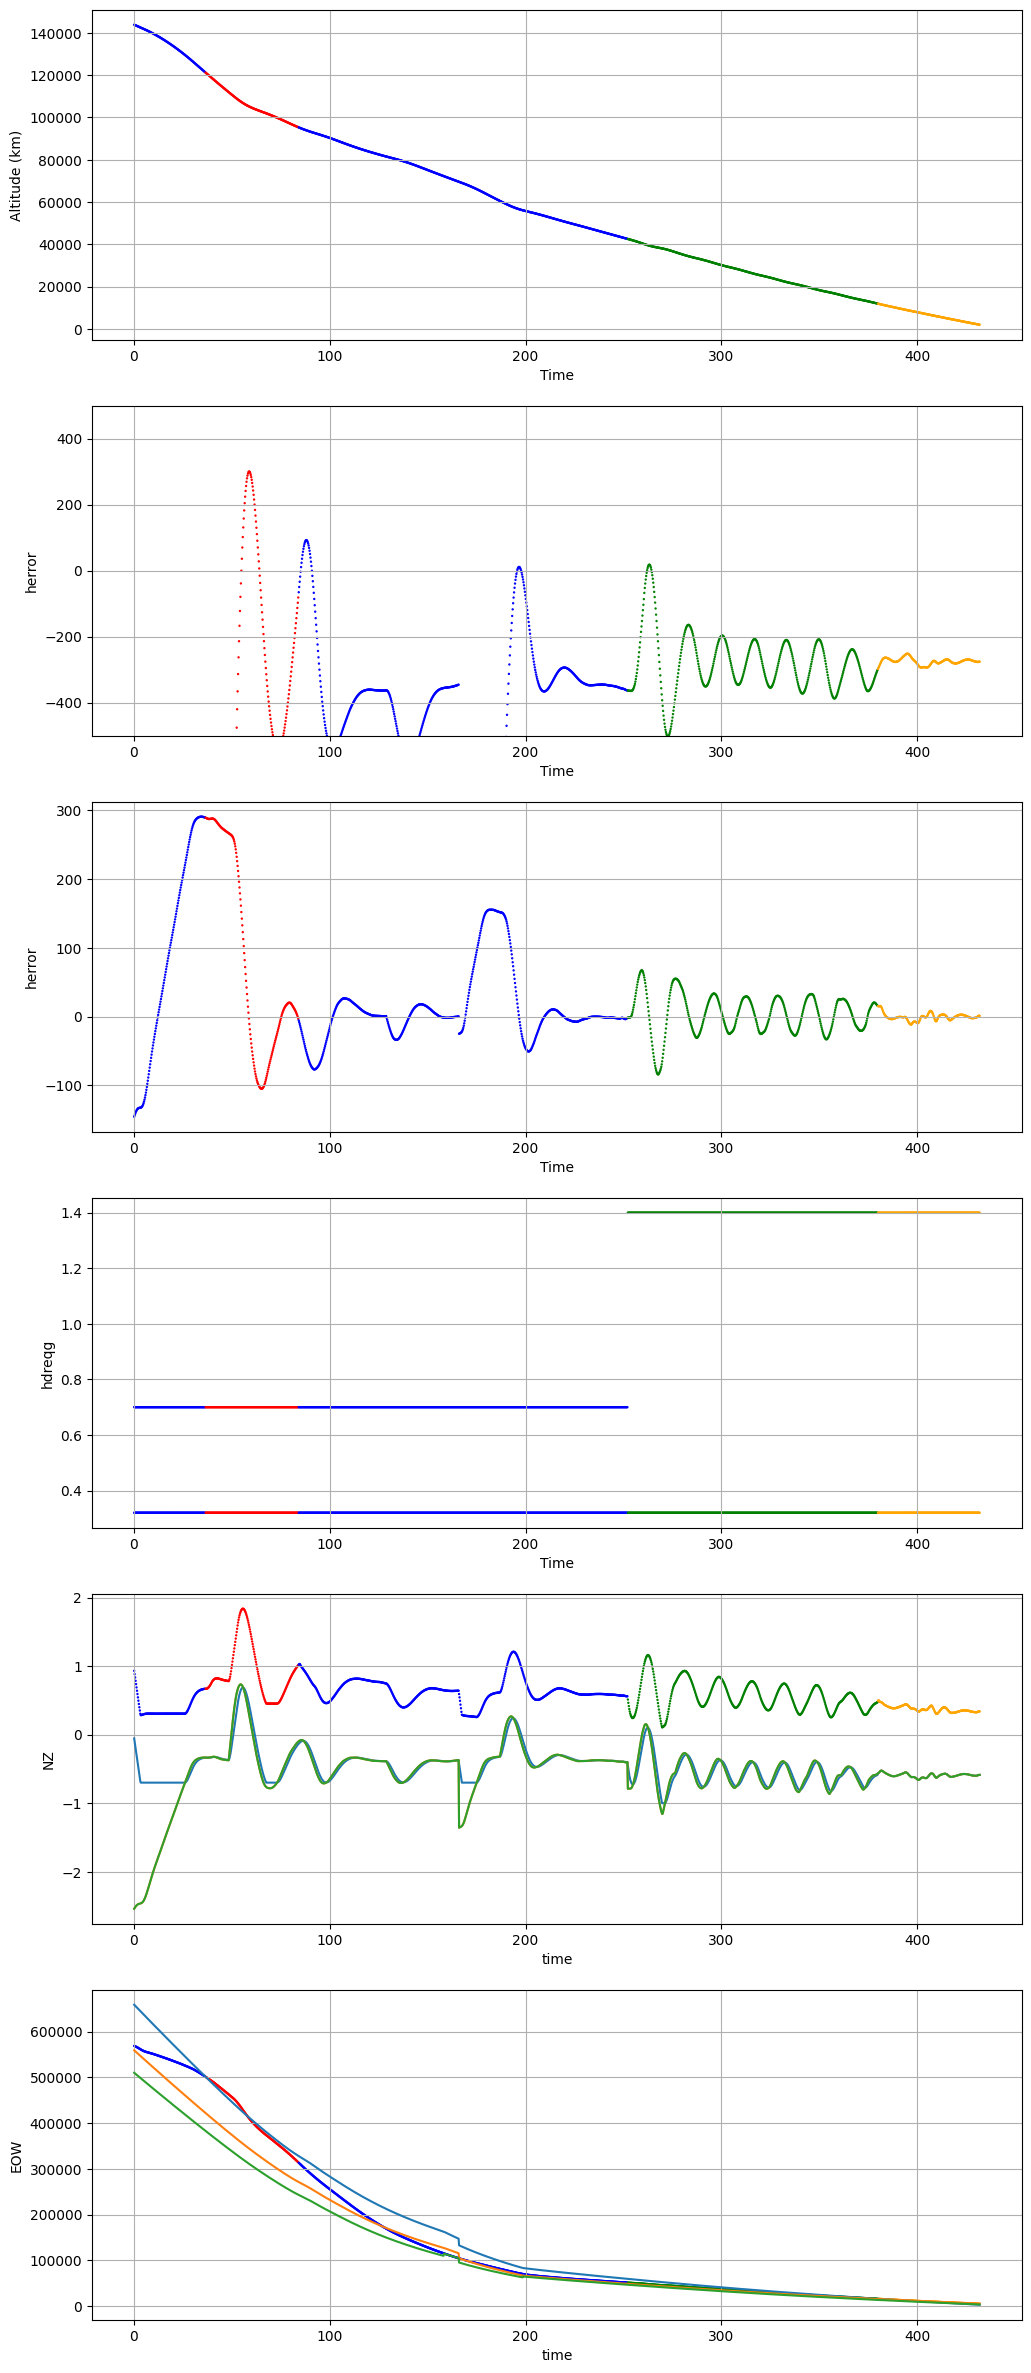

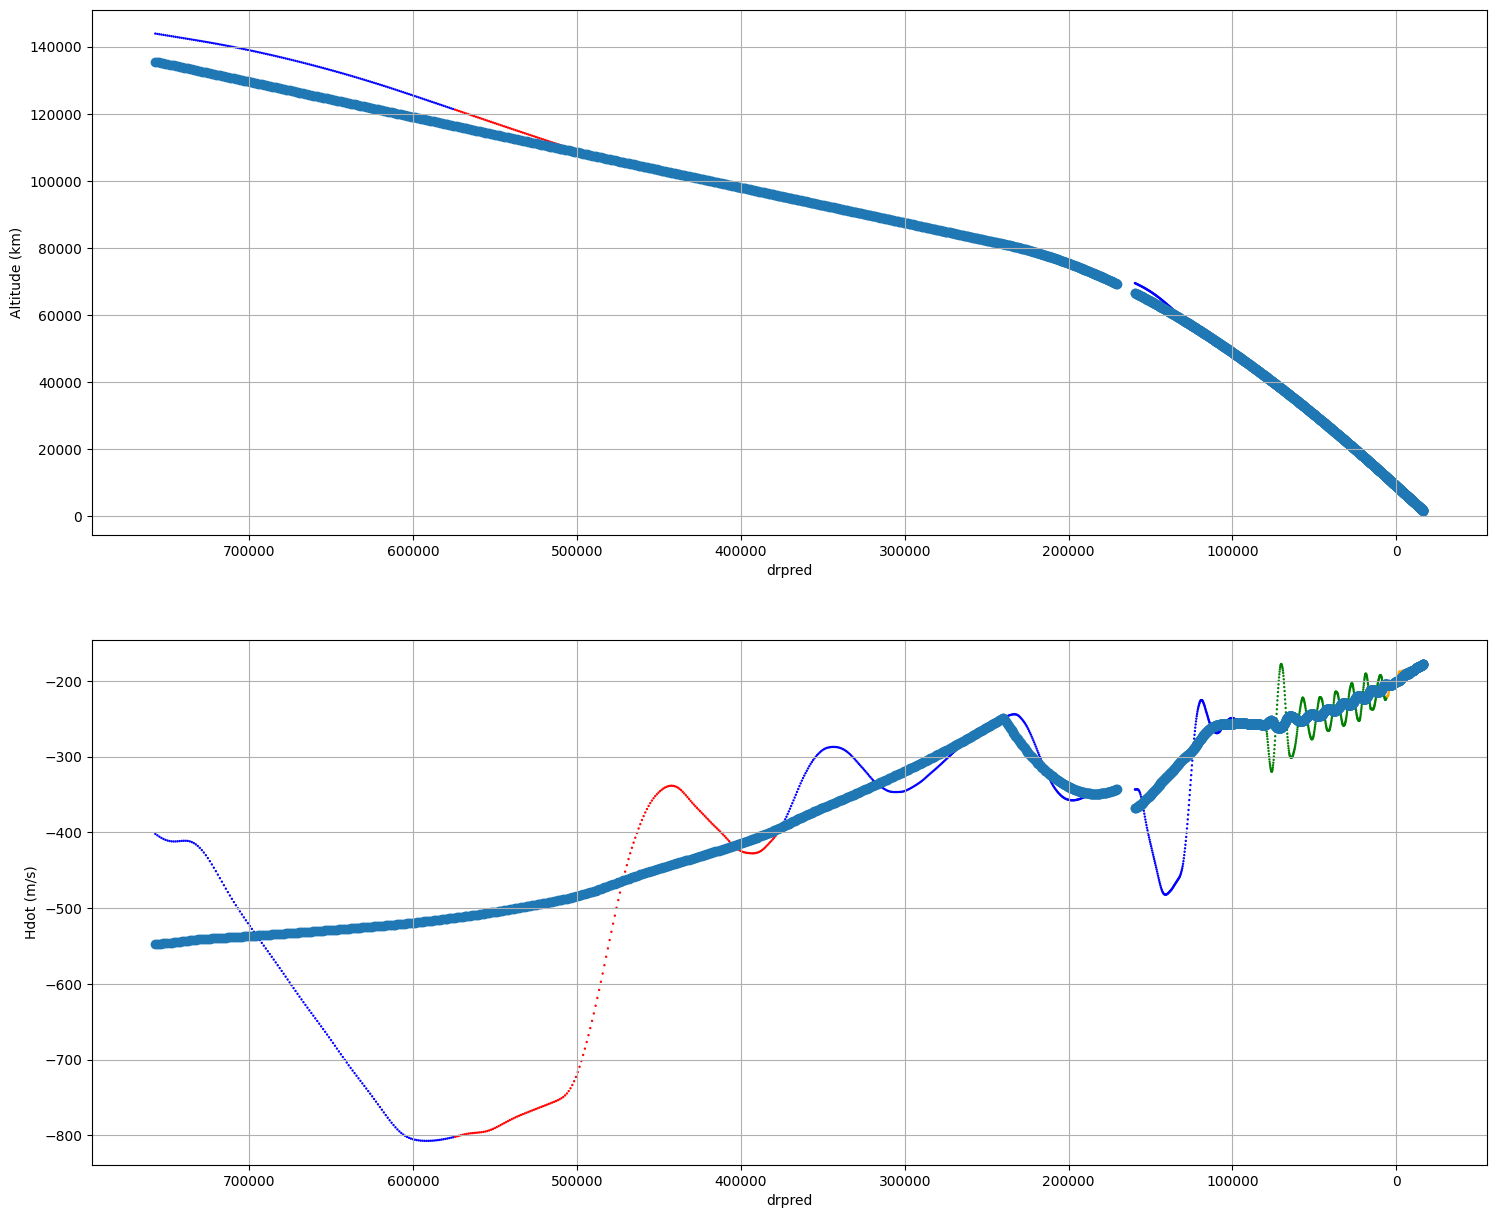

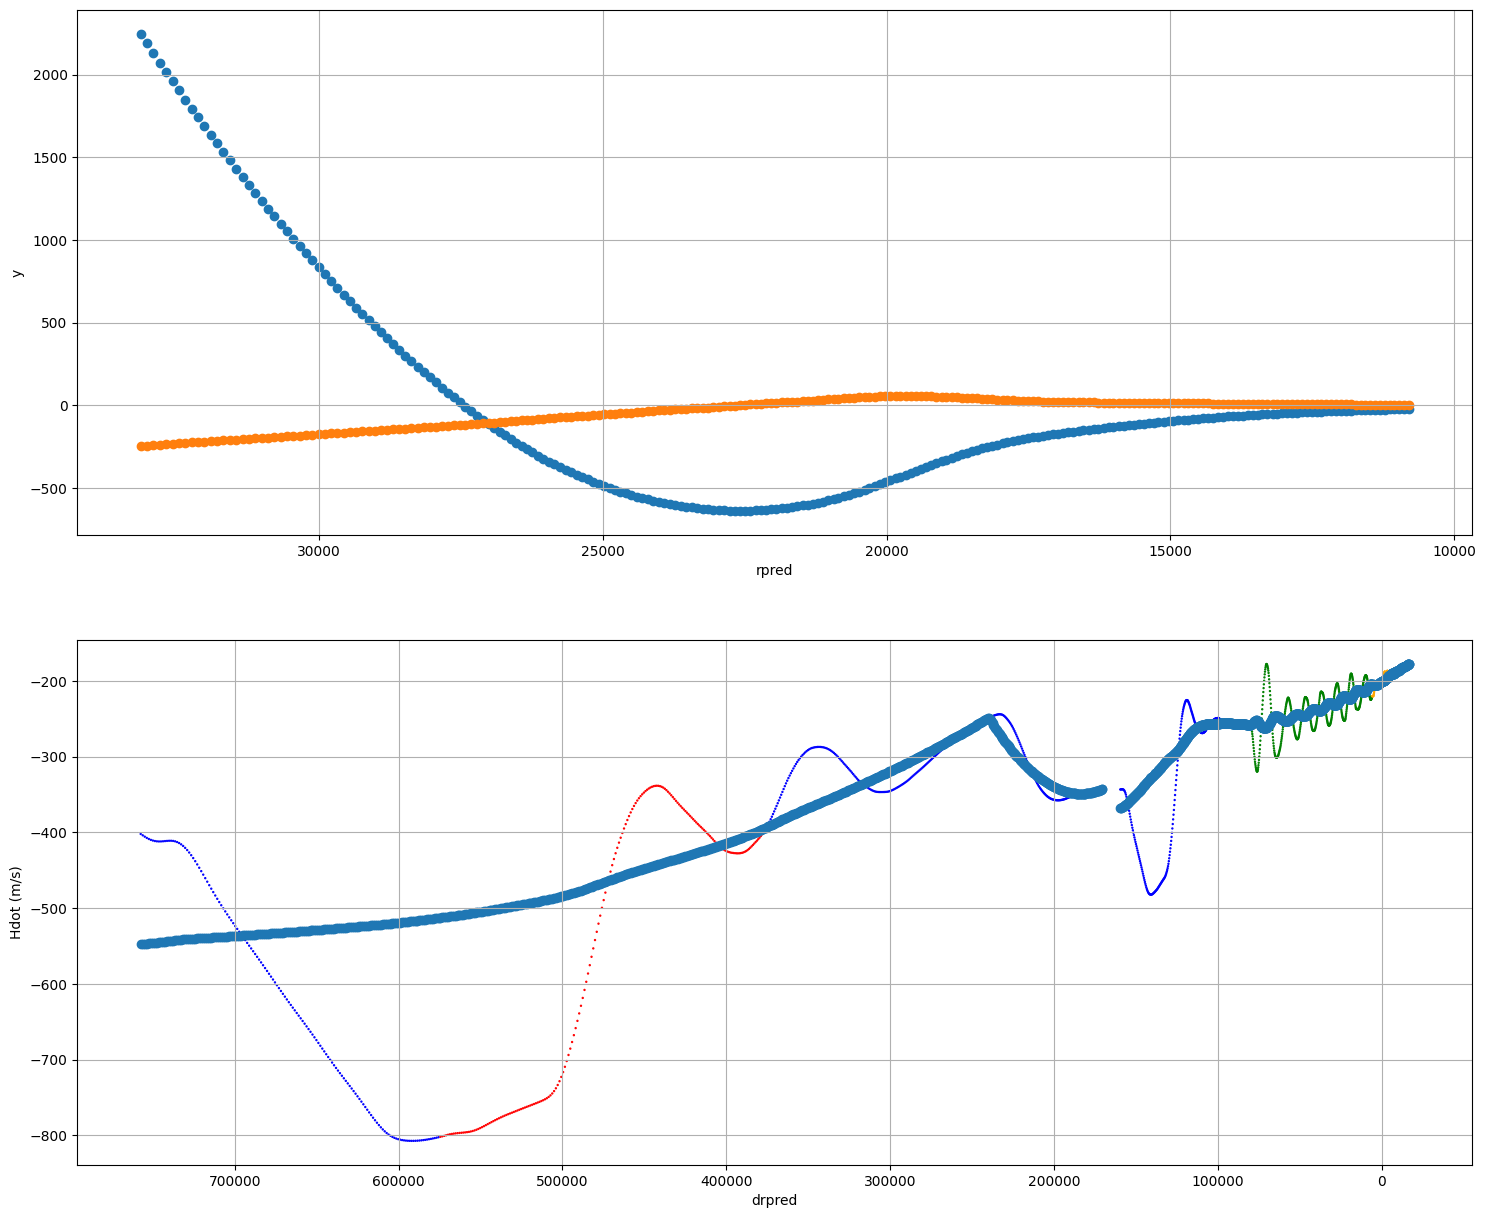

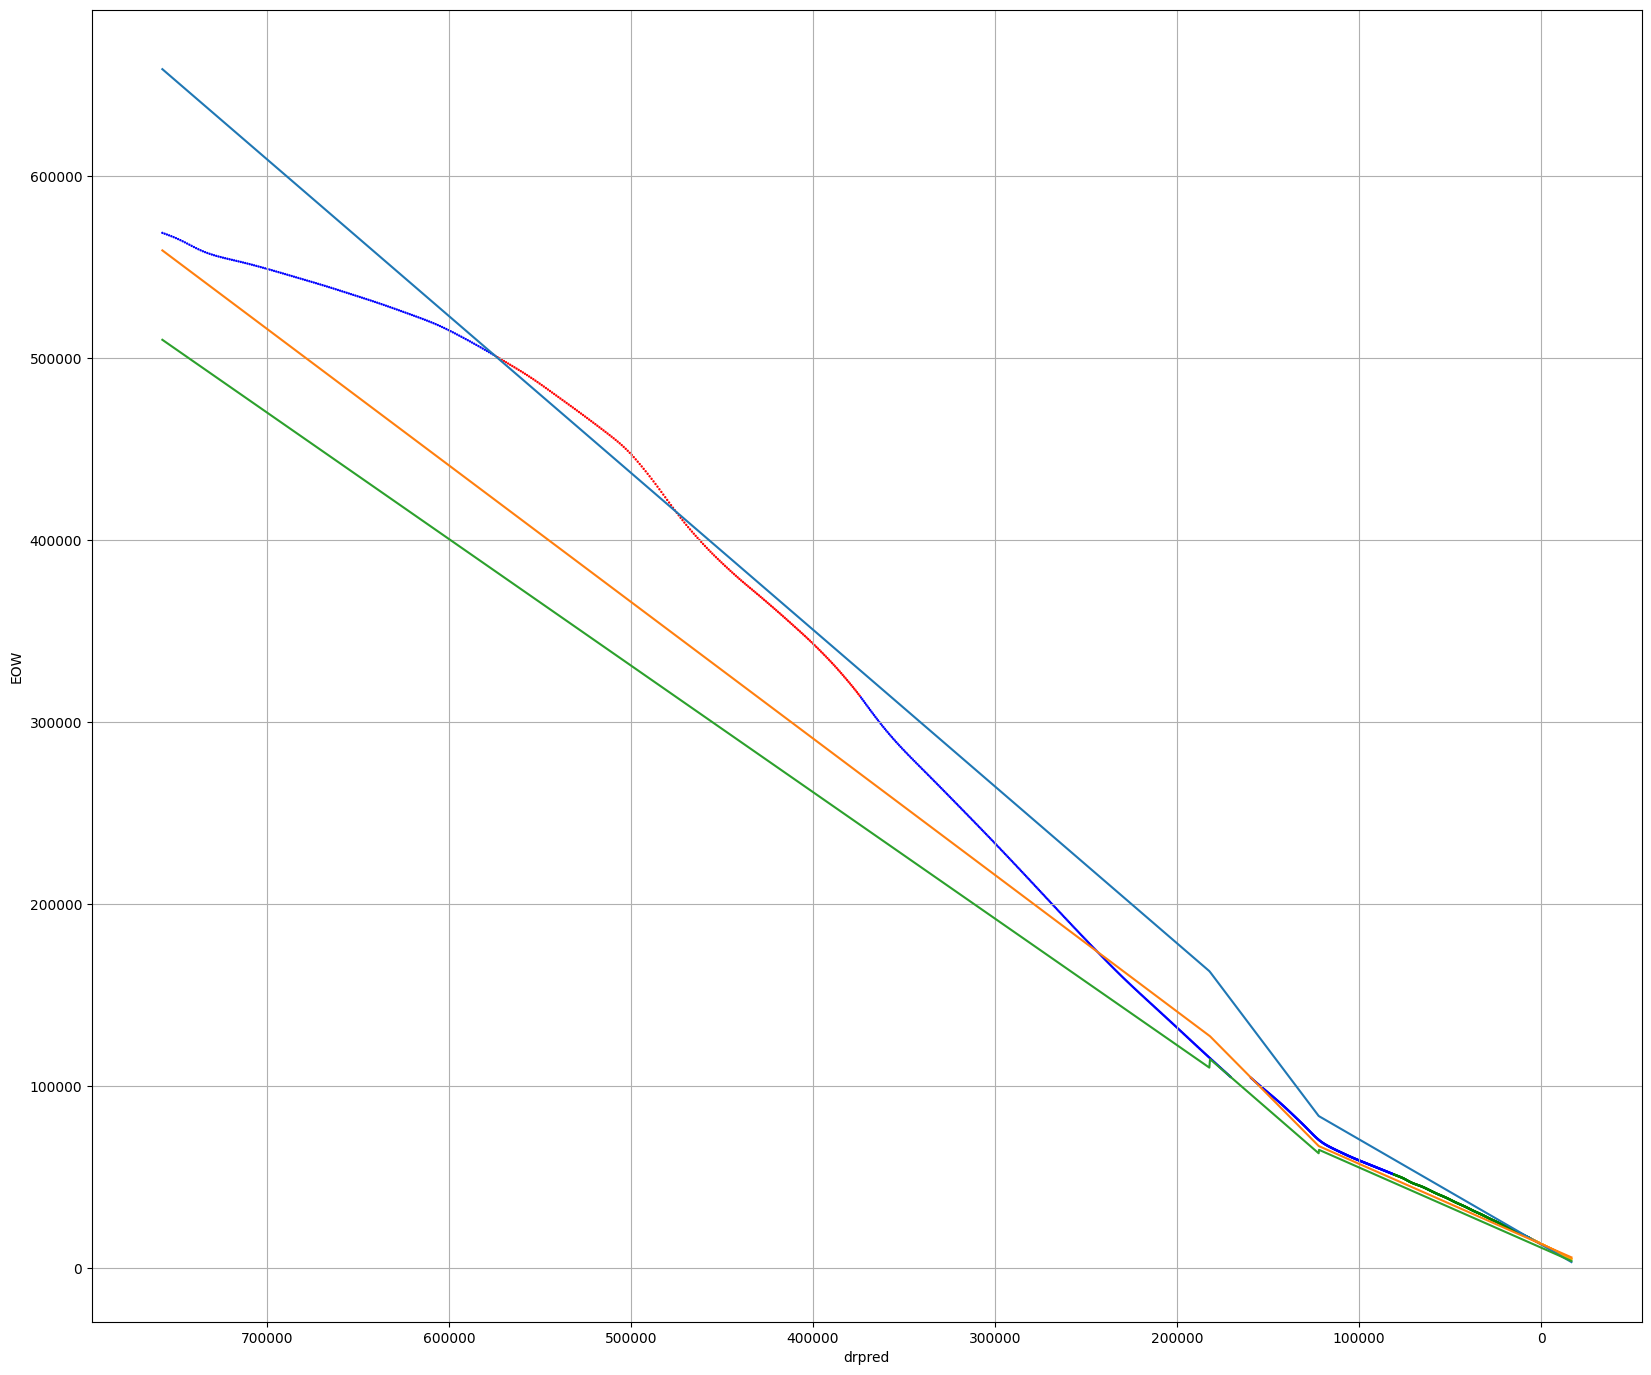

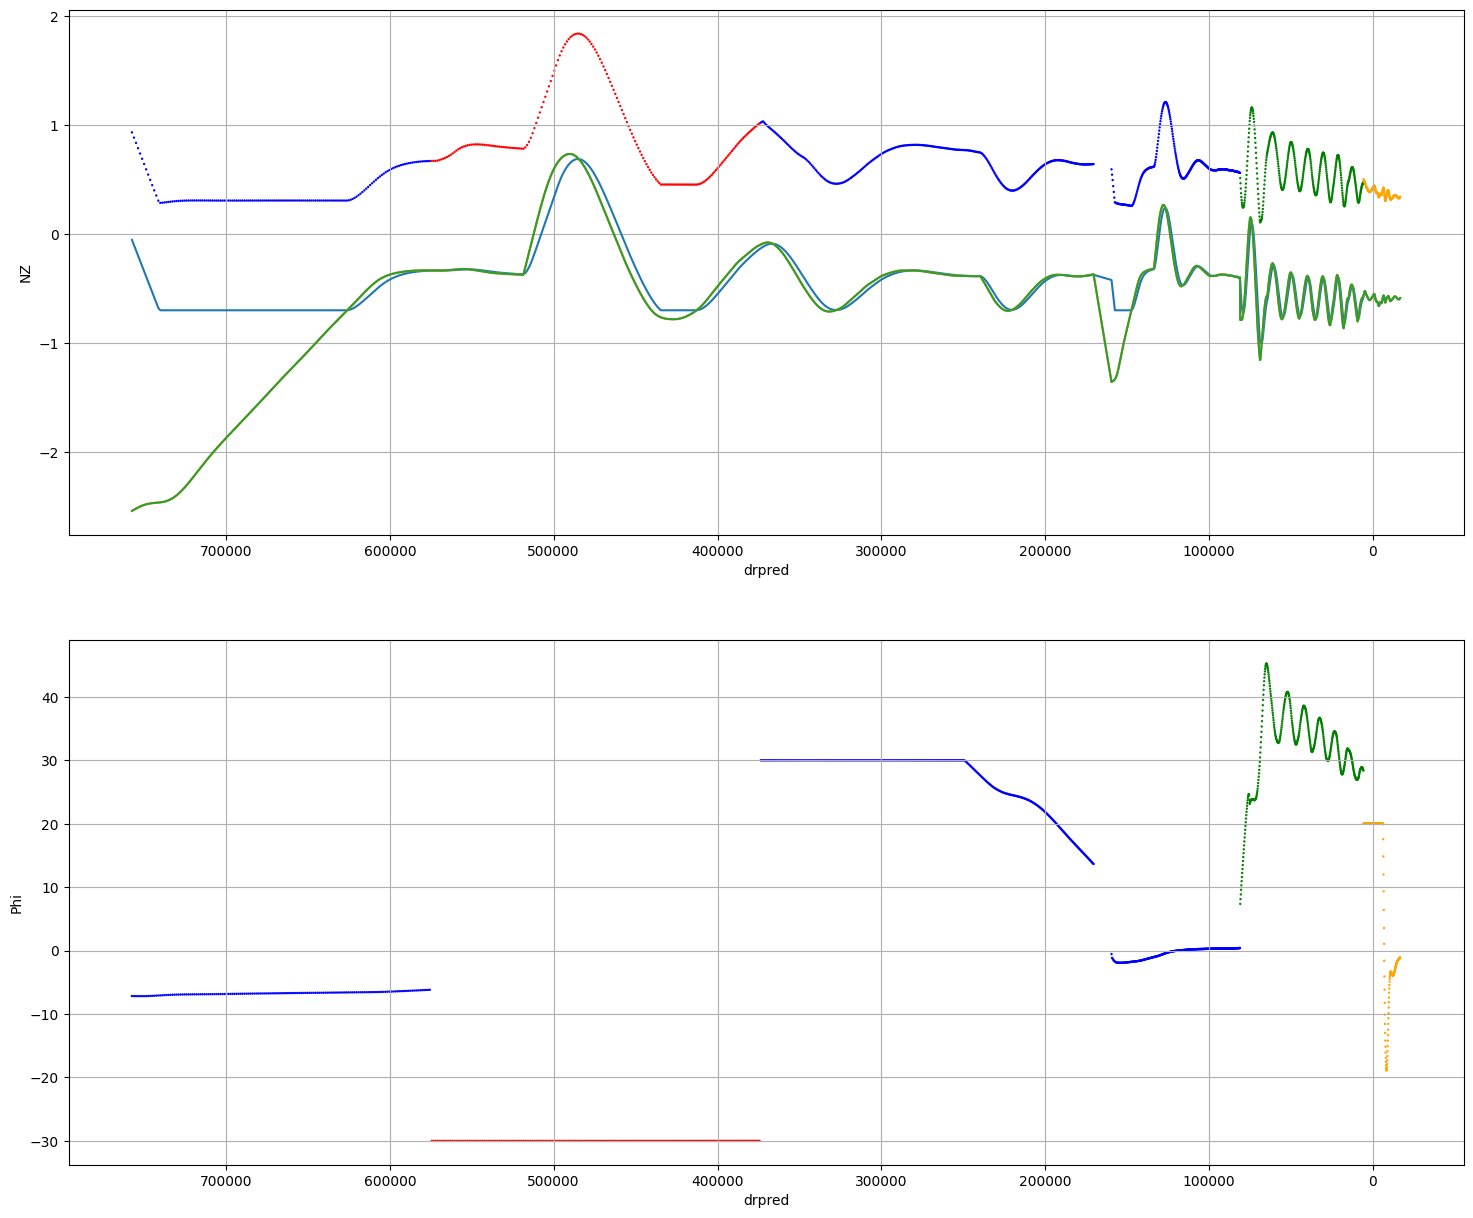

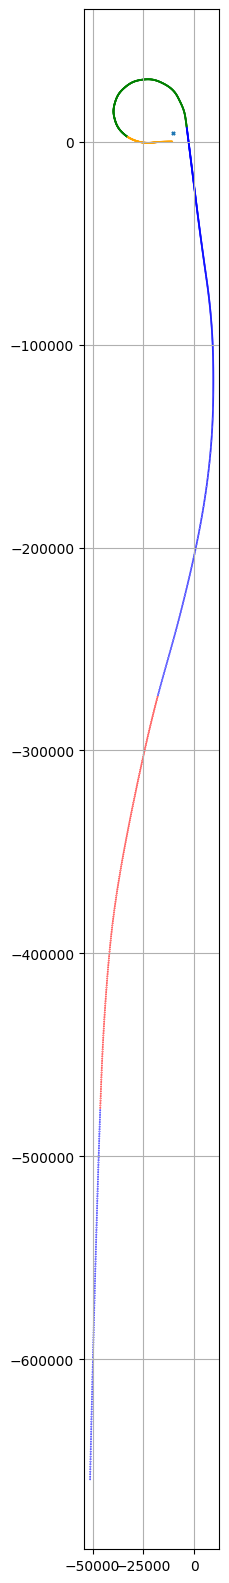

In [1740]:
def taem_plots(data):
    
    

    
    fig_1, ax_1 = plt.subplots(nrows=6, ncols=1, figsize=(12, 5 * 6))

    plt_ = ax_1[0]
    plt_.scatter(data['time'], data['h'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()
    
    plt_ = ax_1[1]
    plt_.scatter(data['time'], data['herror'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('herror')
    plt_.grid()
    plt_.set_ylim([-500, 500])
    
    plt_ = ax_1[2]
    plt_.scatter(data['time'], data['hderr'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('herror')
    plt_.grid()
    
    plt_ = ax_1[3]
    plt_.scatter(data['time'], data['gdh'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.scatter(data['time'], data['hdreqg'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('hdreqg')
    plt_.grid()
                               
    plt_ = ax_1[4]
    plt_.plot(data['time'], data['nzc'])
    plt_.plot(data['time'], data['dnzc'])
    plt_.plot(data['time'], data['dnzcl'])
    plt_.scatter(data['time'], data['nztotal'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('time')
    plt_.set_ylabel('NZ')
    plt_.grid()
    
    plt_ = ax_1[5]
    plt_.scatter(data['time'], data['eow'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['time'], data['es'])
    plt_.plot(data['time'], data['en'])
    plt_.plot(data['time'], data['emep'])
    

    plt_.set_xlabel('time')
    plt_.set_ylabel('EOW')
    plt_.grid()


    



                               
    
    

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.scatter(data['drpred'], data['h'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.scatter(data['drpred'], data['href'])

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_.invert_xaxis()

  


    plt_ = ax[1]
    plt_.scatter(data['drpred'], data['hdot'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.scatter(data['drpred'], data['hdref'])

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Hdot (m/s)')
    plt_.grid()

    plt_.invert_xaxis()

    
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))
    
    final_data = data[data['iphase'] >= 3]

    plt_ = ax[0]
    plt_.scatter(final_data['rpred'], final_data['y'])
    plt_.scatter(final_data['rpred'], final_data['ydot'])

    plt_.set_xlabel('rpred')
    plt_.set_ylabel('y')
    plt_.grid()

    plt_.invert_xaxis()

  


    plt_ = ax[1]
    plt_.scatter(data['drpred'], data['hdot'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.scatter(data['drpred'], data['hdref'])

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Hdot (m/s)')
    plt_.grid()

    plt_.invert_xaxis()

     
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
    plt_ = ax
    plt_.scatter(data['drpred'], data['eow'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['drpred'], data['es'])
    plt_.plot(data['drpred'], data['en'])
    plt_.plot(data['drpred'], data['emep'])
    

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('EOW')
    plt_.grid()

    plt_.invert_xaxis()

    plt_.set_aspect('equal')


    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.plot(data['drpred'], data['nzc'])
    plt_.plot(data['drpred'], data['dnzc'])
    plt_.plot(data['drpred'], data['dnzcl'])
    plt_.scatter(data['drpred'], data['nztotal'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('NZ')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    plt_ = ax[1]
    plt_.scatter(data['drpred'], data['phic_at'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Phi')
    plt_.grid()

    plt_.invert_xaxis()
    
    
        
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

    plt_ = ax
    plt_.scatter(data['x'], data['y'], s=0.1, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    
    plt_.scatter(-10590.456, 4267.2, s=5, marker='x')
    
    plt_.set_aspect('equal')

    plt_.grid()
    
    
    
taem_plots(data_taem)

Text(0, 0.5, 'alt prof')

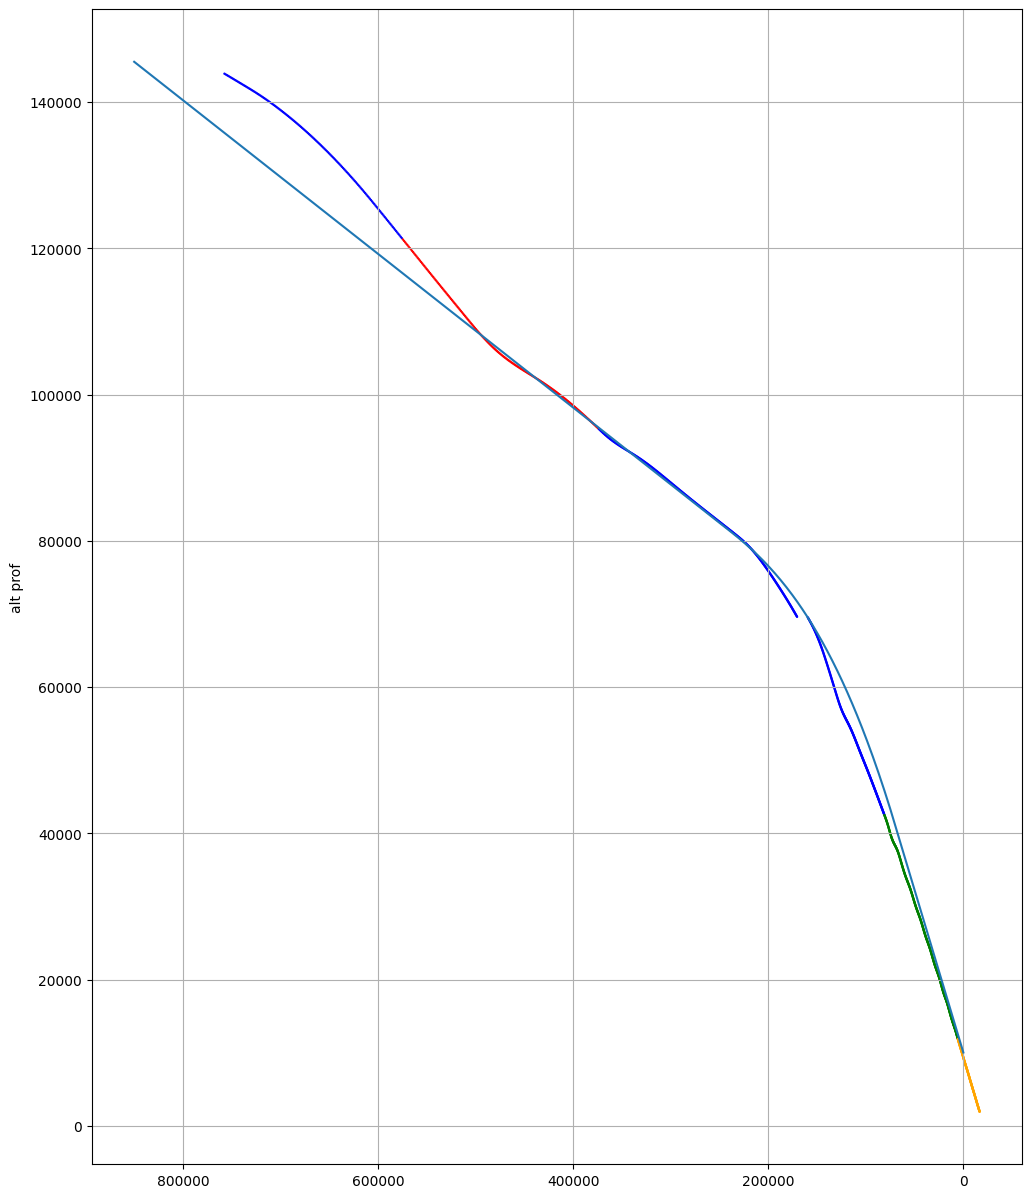

In [1741]:
def href_(drpred):

    tggs = 0.44522869
    pbgc = 0.1051042
    hali = 10018

    pbrc = [0, 0]
    pbhc = [0, 0]

    pbrc[0] = 70000
    pbhc[0] = hali + pbrc[0] * tggs

    pbrc[1] = 237527.82
    pbhc[1] = 81161.826


    dpbrc = pbrc[1] -  pbrc[0]
    dpbhc = pbhc[1] -  pbhc[0]

    chi = dpbhc / (dpbrc**2) - tggs / dpbrc
    th = (pbgc - tggs) / (2*dpbrc)

    cubic_c3 = 3*chi - 2*th
    cubic_c4 = 2*(th - chi) / dpbrc
    
    if (drpred > pbrc[1]):
        return pbhc[1] + pbgc * (drpred - pbrc[1])
    elif (drpred < pbrc[0]):
        return hali + tggs * drpred
    else:
        drpred_1 = drpred -  pbrc[0]
        return pbhc[0] + tggs * drpred_1 + (cubic_c3 + drpred_1 * cubic_c4) * drpred_1**2



drpred = np.linspace(0, 850000, 1000)


href = [href_(r) for r in drpred]



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.plot(drpred, href)

plt_.scatter(data_taem['drpred'], data_taem['h'], s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

plt_.set_ylabel('alt prof')
plt_.grid()


plt_.invert_xaxis()


Text(0, 0.5, 'EOW')

Text(0, 0.5, 'EOW')

(0.0, 100000.0)

(0.0, 100000.0)

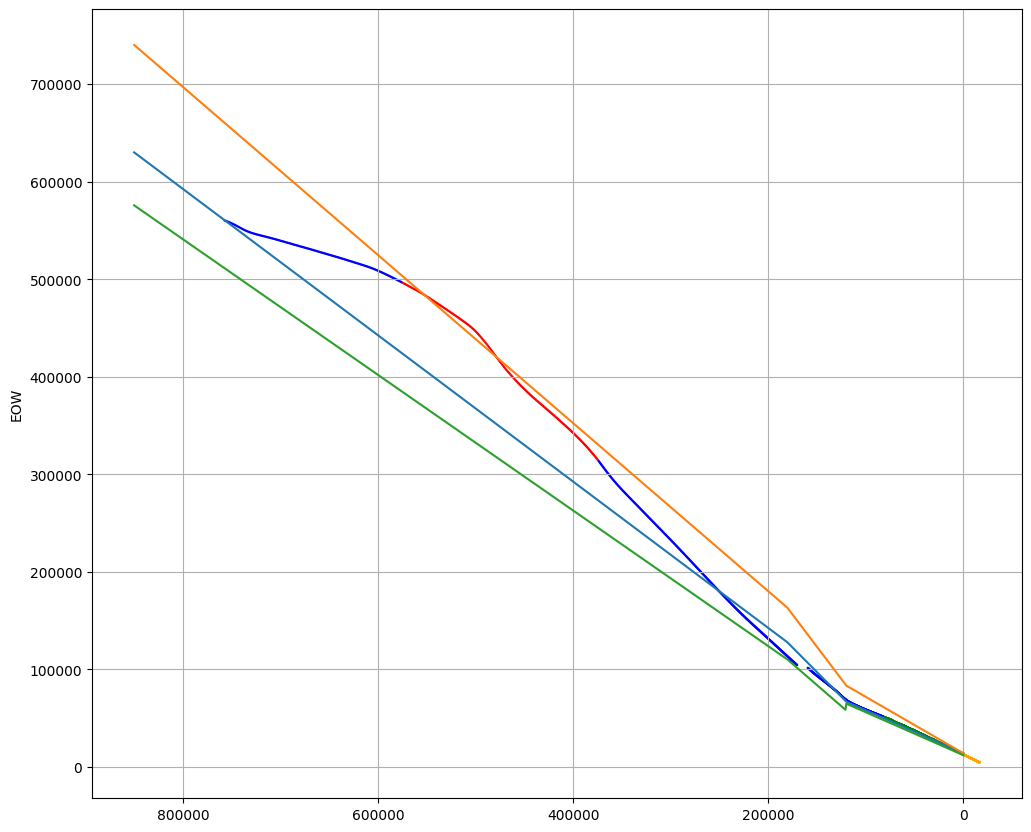

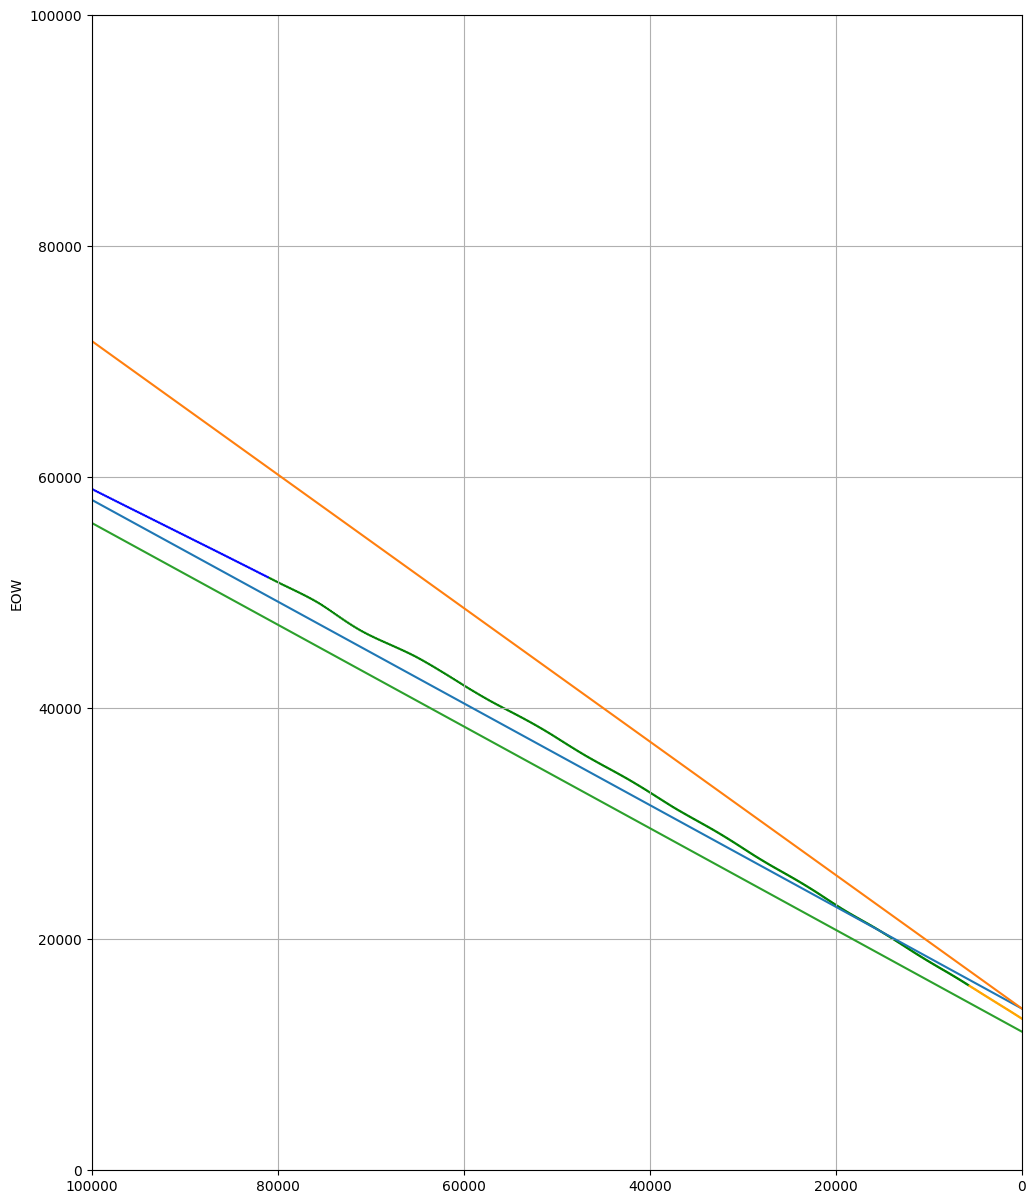

In [1742]:

def emep2_(drpred):
    
    emep_c1 = [-15256.6, -46204, 12000]
    emep_c2 = [0.69517, 0.8671, 0.4404]
    
    eow_spt = [180000, 120000, -1]
    
    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep

def en2_(drpred):
    
    en_c1 = [-7552, -54352, 14000]
    en_c2 = [0.75, 1.01, 0.4404]

    eow_spt = [180000, 120000, -1]
    
    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es2_(drpred):
    
    es_c1 = [7796.6, -75692.8, 14000]
    es_c2 = [0.8615, 1.32533, 0.57789]

    eow_spt = [180000, 120000, -1]

    iel = 0
    while (drpred <= eow_spt[iel]):
        iel += 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    
    return es


drpred = np.linspace(0, 850000, 1000)


en2 = [en2_(r) for r in drpred]
emep2 = [emep2_(r) for r in drpred]
es2 = [es2_(r) for r in drpred]




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()

plt_.set_aspect('equal')

plt_.invert_xaxis()


plt_.scatter(data_taem['drpred'], (data_taem['eow'] + data_taem['herror']), s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()

plt_.scatter(data_taem['drpred'], data_taem['eow'], s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)




plt_.set_xlim([0, 100000])
plt_.set_ylim([0, 100000])

plt_.invert_xaxis()

